In [1]:
import shutil
import os

import matplotlib.pyplot as plt

from Bio import Phylo, AlignIO
from Bio.Seq import Seq

from Bio.SeqRecord import SeqRecord

from Bio.Align import MultipleSeqAlignment
from Bio.AlignIO.PhylipIO import PhylipWriter

In [2]:
input_dir = "../data/language_alignments/"
#alignment_file = "Indo-European_WALS_BinaryOutgroup_March21_stability.ONLYFIN_common_grammatical"
alignment_file = "morpho"
align = AlignIO.read(input_dir + alignment_file + ".phy",'phylip')
records = []
for i in range(0, len(align)):
    full_sequence = align[i].id.split(" ")[-1] + align[i].seq
    records.append(SeqRecord(Seq(full_sequence), id=align[i].id.split(" ")[0]))
fixed_align = MultipleSeqAlignment(records, annotations={}, column_annotations={})
with open(input_dir + alignment_file + "_fixed.phy","w+") as f:
    writer = PhylipWriter(f)
    writer.write_alignment(fixed_align)

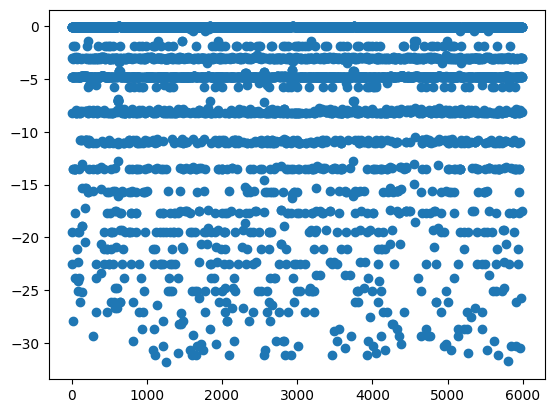

In [67]:
input_dir = "../data/language_alignments/"
#alignment_file = "Indo-European_WALS_BinaryOutgroup_March21_stability.ONLYFIN_common_grammatical"
alignment_file = "IE2011_RelaxedCovarion_AllSingletonsGeo"
align = AlignIO.read(input_dir + alignment_file + "_fixed.phy",'phylip')

per_site_likelihoods = []

shutil.rmtree("../output/raxml/temp", ignore_errors=True)
for i in range(0, align.get_alignment_length()):
    
    os.mkdir("../output/raxml/temp/")
    
    records = []
    for j in range(0, len(align)):
        records.append(SeqRecord(Seq(align[j, i]), id=align[j].id))
    sub_align = MultipleSeqAlignment(records, annotations={}, column_annotations={})
    #print(sub_align)
    with open("../output/raxml/temp/site.phy","w+") as f:
        writer = PhylipWriter(f)
        writer.write_alignment(sub_align)
        
    open("../output/raxml/temp/console_out.txt", 'w').close()
        
    os.system('./../raxml-ng/build/bin/raxml-ng --evaluate --msa ../output/raxml/temp/site.phy --threads 1 --model BIN --tree ../output/geo.tree --prefix ../output/raxml/temp/E_1 > ../output/raxml/temp/console_out.txt')
    log_file = open('../output/raxml/temp/console_out.txt', 'r')
    lines = log_file.readlines()
    for line in lines:
        if(line.startswith('Final LogLikelihood:')):
            per_site_likelihoods.append(float(line.split(" ")[2].strip()))
    shutil.rmtree("../output/raxml/temp", ignore_errors=True)
#print(per_site_likelihoods)

with open('../output/geo_per_site_' + alignment_file + ".txt", 'w') as f:
    for l in per_site_likelihoods:
        f.write(str(l) + "\n")

plt.scatter([i for i in range(len(per_site_likelihoods))], per_site_likelihoods)
plt.show()

In [66]:
threshold = -5.0
per_site_likelihoods = []
input_dir = "../data/language_alignments/"
alignment_file = "Indo-European_WALS_BinaryOutgroup_March21_stability.ONLYFIN_common_grammatical"
#alignment_file = "IE2011_RelaxedCovarion_AllSingletonsGeo"
align = AlignIO.read(input_dir + alignment_file + "_fixed.phy",'phylip')

l_file = open('../output/geo_per_site_' + alignment_file + ".txt", 'r')
lines = l_file.readlines()

filtered_align = None

records = []
for i in range(0, align.get_alignment_length()):
    
    if(float(lines[i].strip()) < threshold):
        if filtered_align is None:
            filtered_align = align[:, i:i+1]
        else:
            filtered_align = filtered_align + align[:, i:i+1]
print(filtered_align)
with open(input_dir + alignment_file + "_filtered_" + str(threshold) + ".phy","w+") as f:
    writer = PhylipWriter(f)
    writer.write_alignment(filtered_align)


Alignment with 46 rows and 219 columns
00100011001100101001001001010110000100100101...000 It
10000101001100101001001001010110000100100100...000 Sp
10001001010100101001001001010110000100100100...001 Cat
00100011001100101001001001010110000100100110...001 Fr
00100011001100101001001001010110000100100100...000 Ptg-E
10000101001100101000101001010100100100100101...000 Rm
01001001010101001000101001010100010001100100...010 Lat
01001000101101001000101001010110000010100100...010 ClG
01000100100100101000101001010110000100100100...010 Grk
010010010101010???00101001010101000010100110...010 Got
010010010101010???00101001010101000010100100...010 OE
00100011001100101000101010010110001000101001...000 E
01001001010100101000101001010110000100100110...010 Ger
00100011001100110001001010010100101000100101...010 Da
01001001010100101000101001010100100010100100...010 Ice
00100011001100110001001001010100100100100101...010 Swe
01001001010100101000101001010100100100100100...010 Far
00100011001100101000101001010110

KeyboardInterrupt: 